In [35]:
# Start Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Loading The Train
train = pd.read_csv("../datasets/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Loading The Test
test = pd.read_csv("../datasets/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Put Labels Into y_train Variable
Y_train = train['label']
# drop label column
X_train = train.drop(labels = ["label"], axis = 1)

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

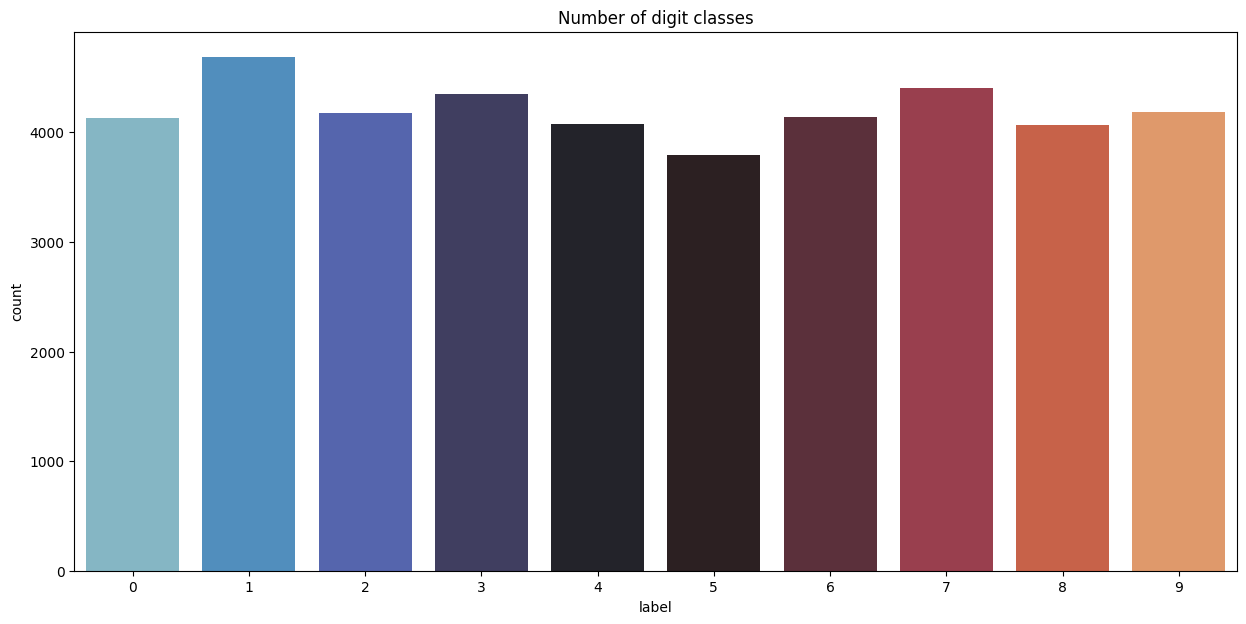

In [39]:
# Visualize Number Of Digits Classes
plt.figure(figsize=(15,7))
sns.countplot(x=Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

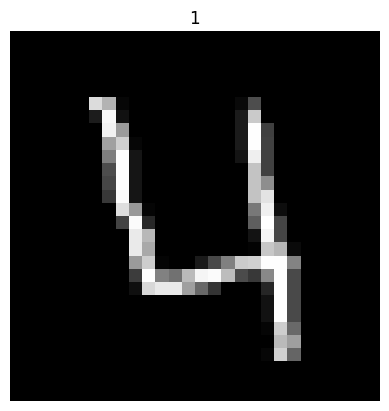

In [40]:
# Plot Some Samples 
img = X_train.iloc[3].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis('off')
plt.show()

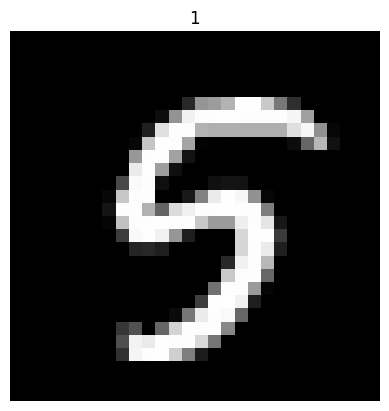

In [41]:
# Plot Some Samples 
img = X_train.iloc[8].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis('off')
plt.show()

In [42]:
# Normalize The Data 
X_train = X_train /255.0
test = test /255.0

In [43]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print(X_train.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [44]:
# Label Encoding
Y_train_array = np.array(Y_train).astype('int')
Y_train = np.eye(10)[Y_train_array]
print(Y_train.shape)
print(Y_train[0])

(42000, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [45]:
# Split The Train And The Validition Set For The Fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)


(37800, 28, 28, 1)
(4200, 28, 28, 1)
(37800, 10)
(4200, 10)


In [46]:
# Implemnenting With Keras
# conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)

In [47]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from keras.optimizers import RMSprop,Adam
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Input(shape=(28, 28, 1)))

model.add(Conv2D(filters=8,kernel_size=(5,5),padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [48]:
# Define The Optimizer
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [49]:
# compile the model
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ["accuracy"])

In [50]:
epochs = 100
batch_size = 250

In [51]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=5,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=False, 
        vertical_flip=False)

datagen.fit(X_train)

In [52]:
# Fit The Model
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_val, Y_val),
    steps_per_epoch=X_train.shape[0] // batch_size
)

Epoch 1/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.6242 - loss: 1.1165 - val_accuracy: 0.9357 - val_loss: 0.2491
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 0.6770 - val_accuracy: 0.9350 - val_loss: 0.2457
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8532 - loss: 0.4535 - val_accuracy: 0.9579 - val_loss: 0.1496
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8840 - loss: 0.3183 - val_accuracy: 0.9571 - val_loss: 0.1511
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8954 - loss: 0.3313 - val_accuracy: 0.9633 - val_loss: 0.1120
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9000 - loss: 0.2905 - val_accuracy: 0.9633 - val_loss: 0.1123
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9135 - loss: 0.2720 - val_accuracy: 0.9700 - val_loss: 0.0960
Epoch 8/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9320 - loss: 0.2298 - val_

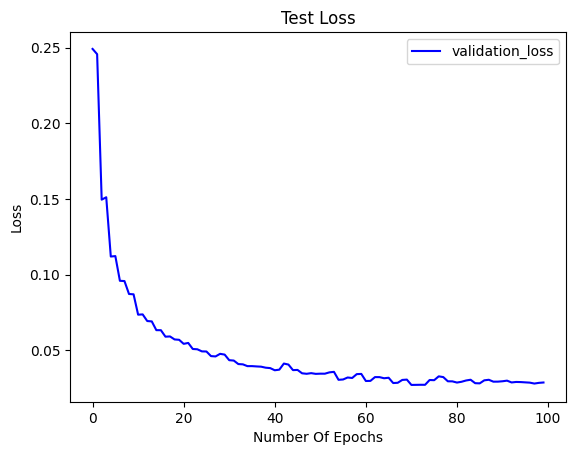

In [53]:
# Plot The Loss And Accuracy Curves For Traning And Validation
plt.plot(history.history['val_loss'], color = 'b', label = 'validation_loss')
plt.title('Test Loss')
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


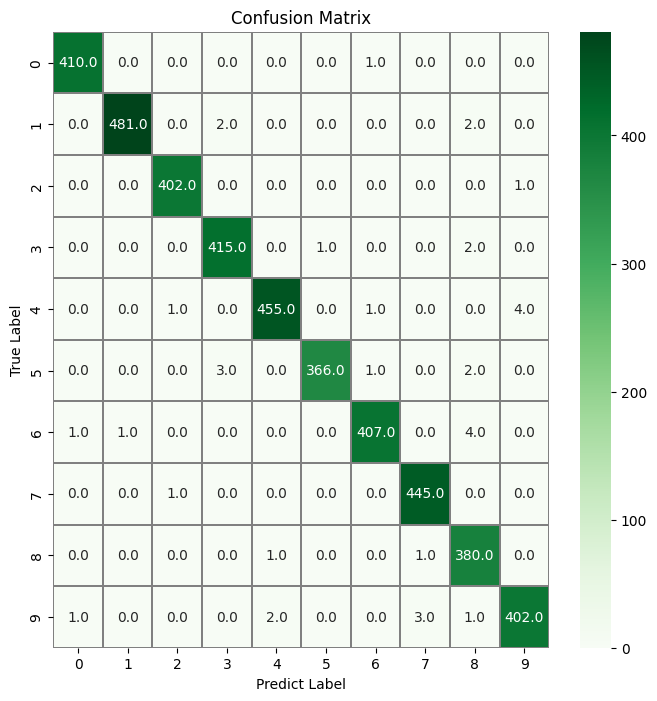

In [54]:
# Confusion Matrix
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred ,axis = 1)
Y_true = np.argmax(Y_val, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx, annot = True, linewidths=0.01, cmap= 'Greens', linecolor='gray', fmt='.1f', ax=ax)
plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()